## IMPORT LIBRARIES AND DATASET

In [1]:
#pandas is a data manipulation and analysis library for Python, providing data structures like DataFrame and Series 
#for efficient handling of structured data.
import pandas as pd

#numpy is a numerical computing library that supports large, multi-dimensional arrays and matrices, along with 
#mathematical functions for array operations.
import numpy as np

#seaborn is a statistical data visualization library built on Matplotlib, offering a high-level interface for 
#creating visually appealing and informative statistical graphics.
import seaborn as sns

#matplotlib.pyplot is a plotting library for Python that produces static, animated, and interactive visualizations, 
#offering a MATLAB-like interface for creating plots.
import matplotlib.pyplot as plt

#The os module provides a way to interact with the operating system, offering functions for tasks like reading or 
#manipulating file paths.
import os

#jupyterthemes is a module allowing customization of Jupyter notebook appearance with predefined themes, and in this code, 
#it applies the 'monokai' theme for a dark visual style.
#from jupyterthemes import jtplot

#This line of code utilizes the jtplot module to set the Jupyter notebook's visual style, applying the 'monokai' 
#theme with specific settings like ticks enabled and grid disabled.
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
#To display first handful of records
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
"""The 'Serial No.' column does not seem to contain meaningful information for analysis or modeling. 
It appears to be just a unique identifier assigned to each row."""
admission_df.drop('Serial No.', axis = 1, inplace = True) 
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
""" using the groupby method in pandas to group the DataFrame admission_df by the 'University Rating' column and 
then calculate the mean value for each numerical column within each group."""
df_university = admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


## PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

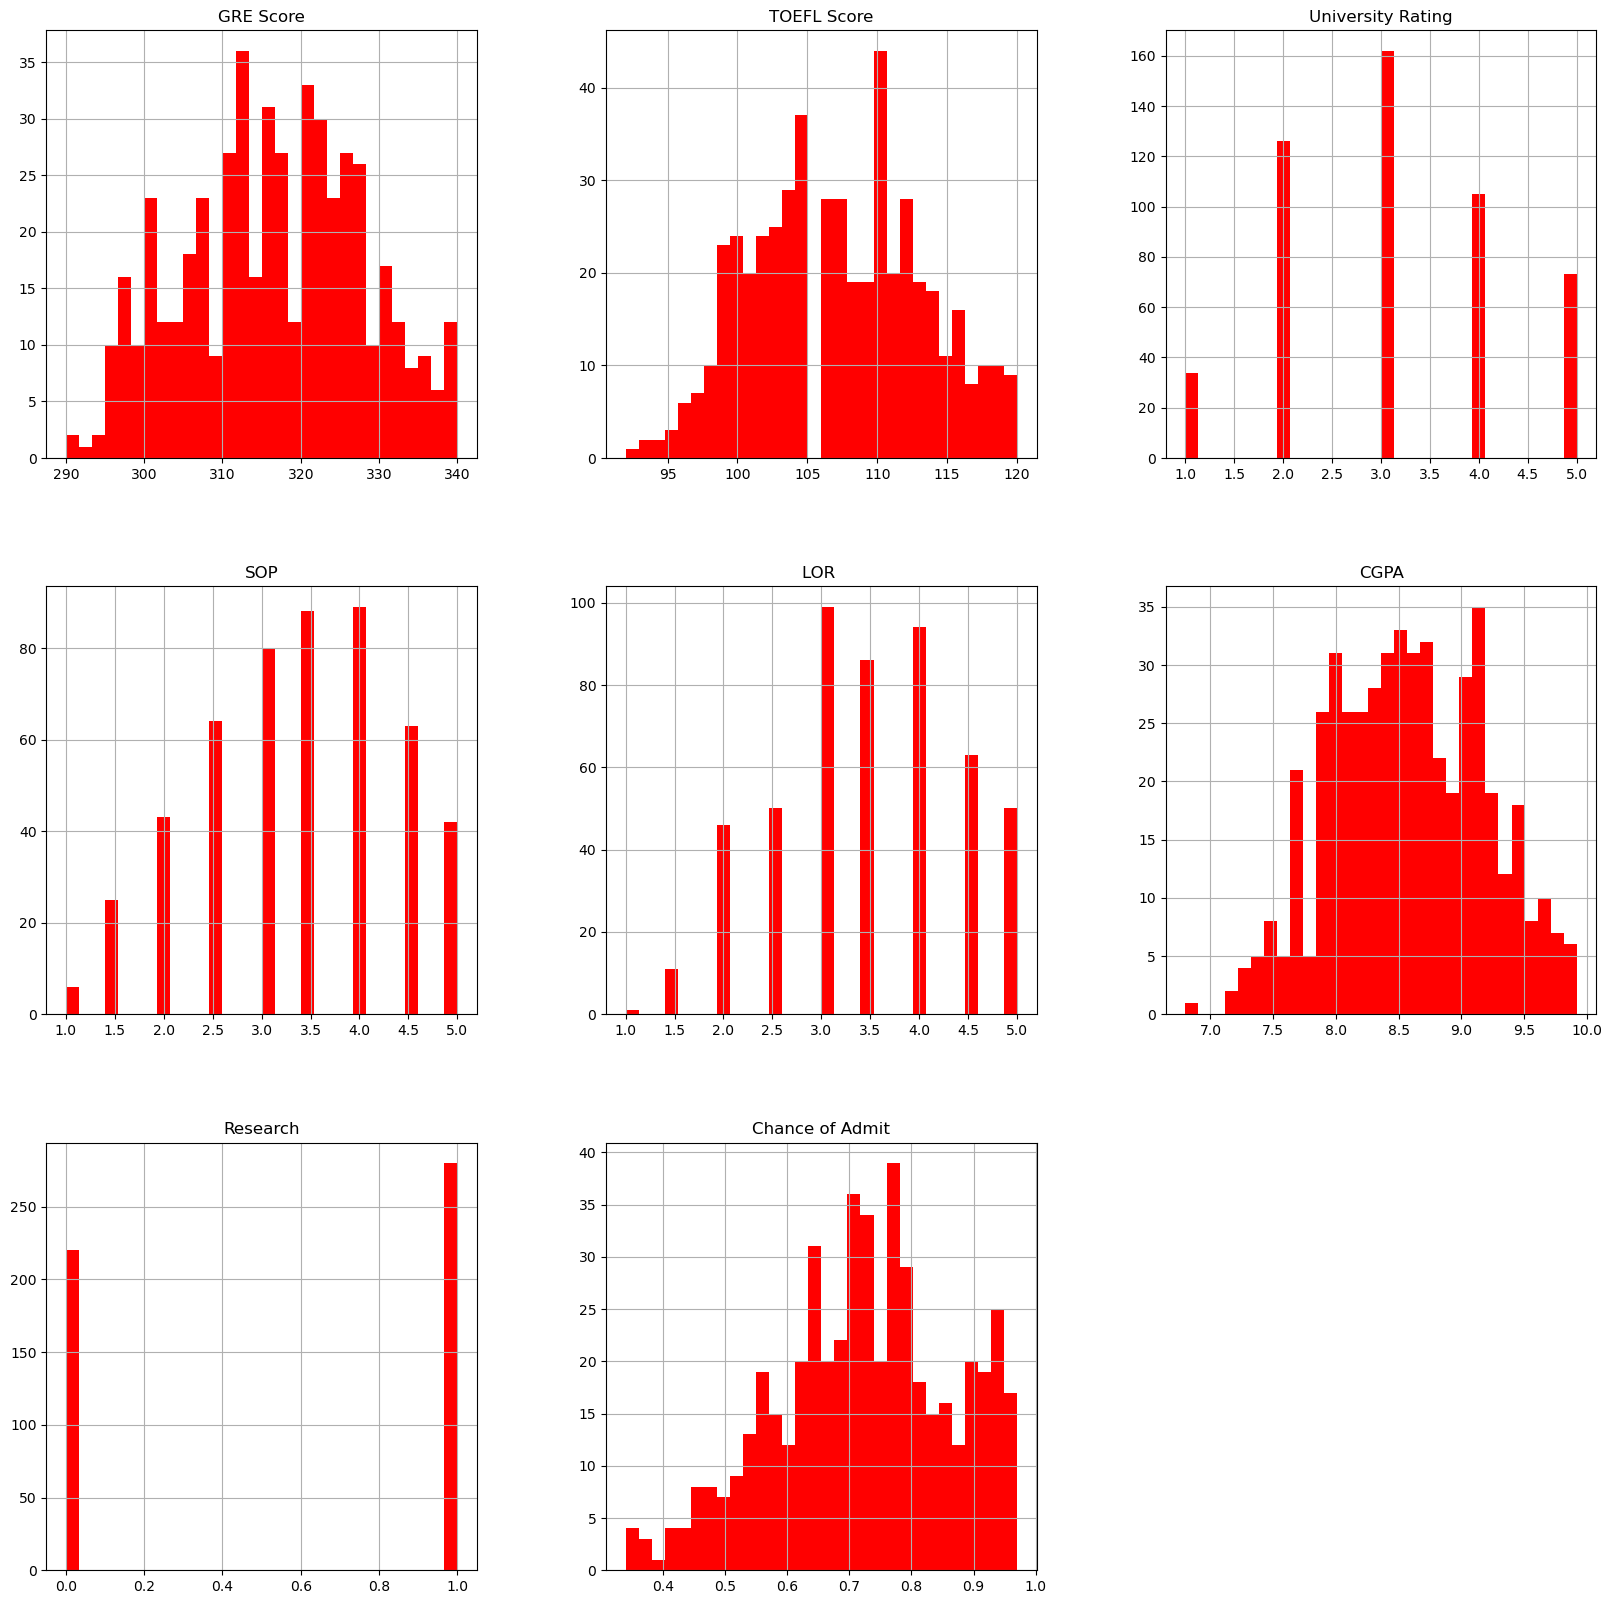

In [9]:
"""The code is using the hist method in pandas to create histograms 
for each numerical column in the DataFrame admission_df."""
admission_df.hist(bins = 30, figsize = (20,20), color = 'r')


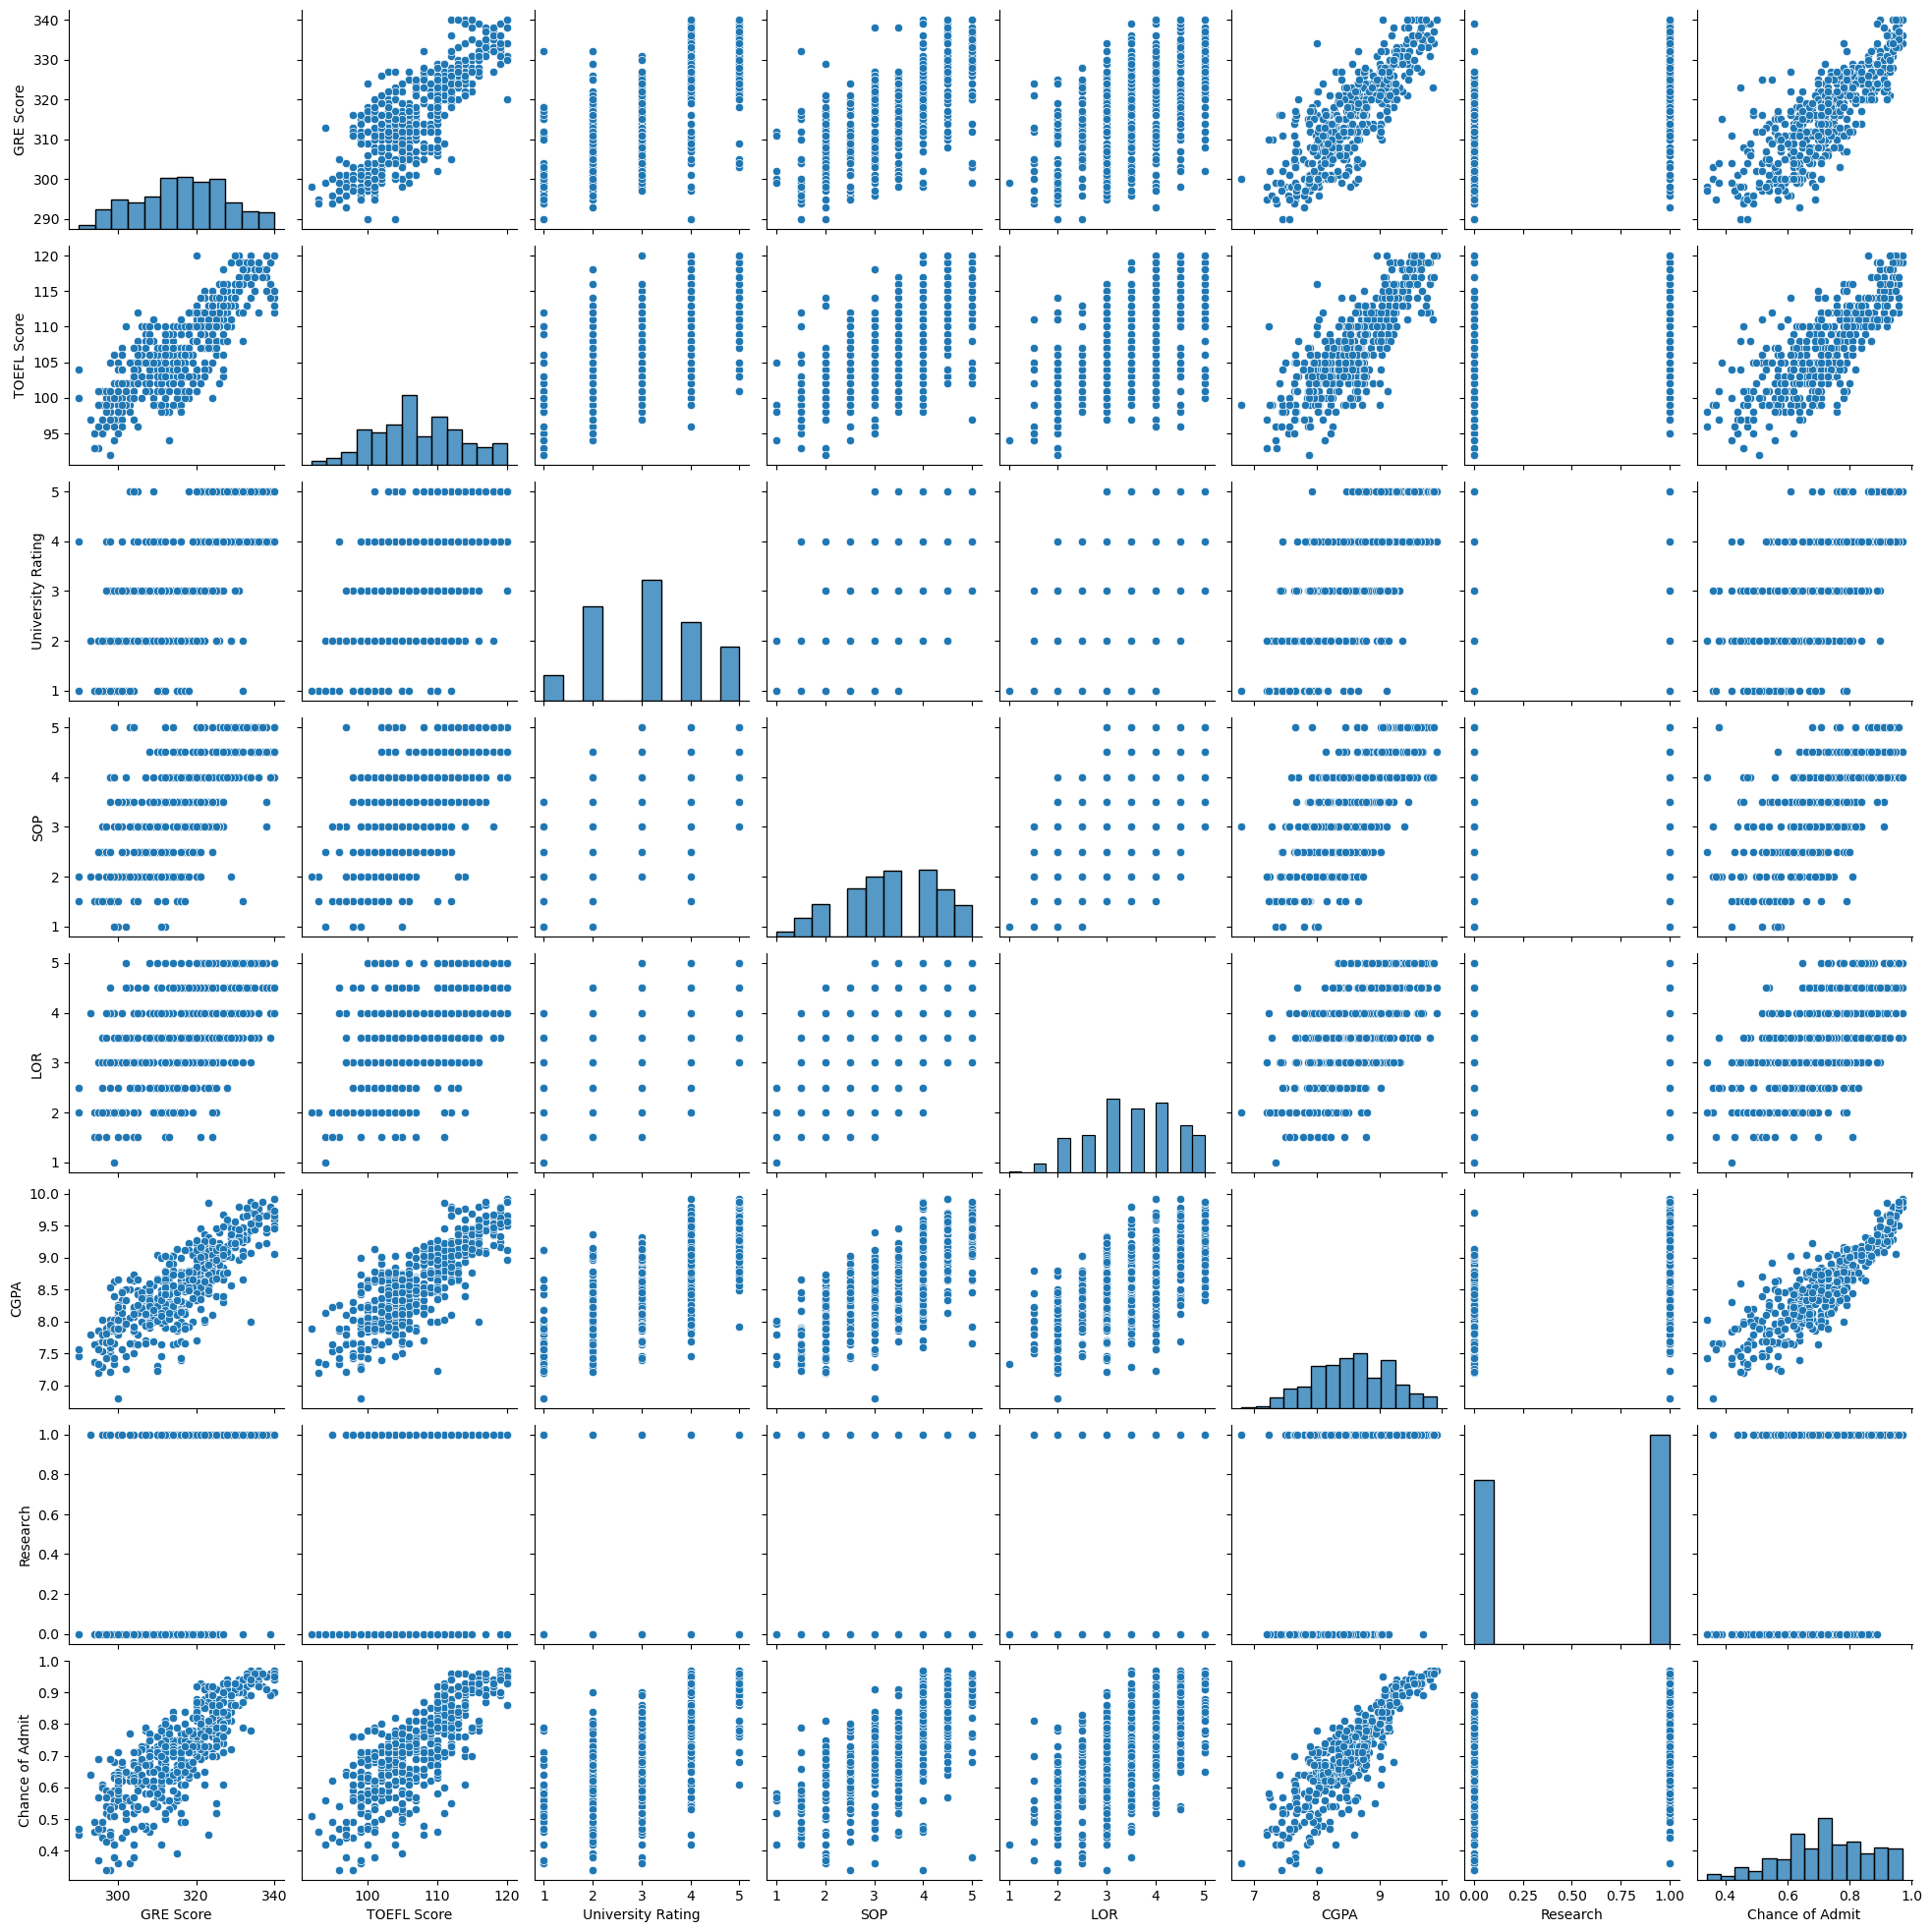

In [10]:
"""The code sns.pairplot(admission_df) creates a grid of scatterplots for each pair of numerical columns in the DataFrame 
admission_df. It's a visual tool that helps us understand relationships and patterns between different factors, like GRE Score, 
TOEFL Score, and CGPA. Each point on a scatterplot represents a combination of values from two columns, and the diagonal shows 
histograms for individual columns, providing insights into their distributions. It's a quick way to get a visual overview of 
how different variables in the dataset are related."""
sns.pairplot(admission_df)

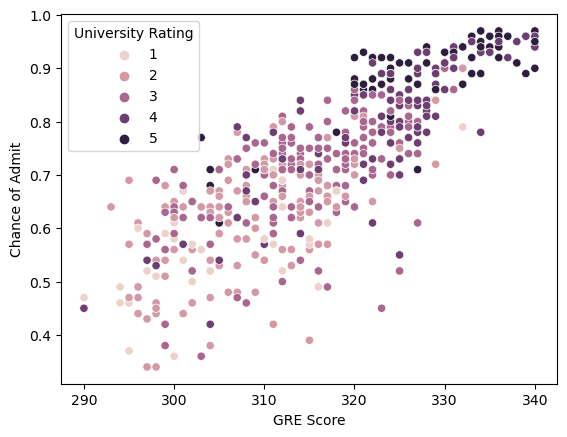

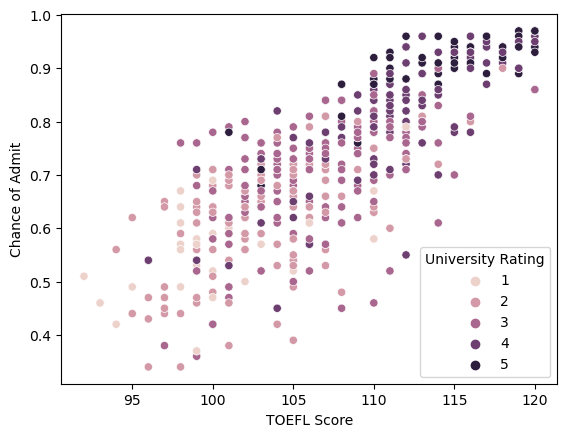

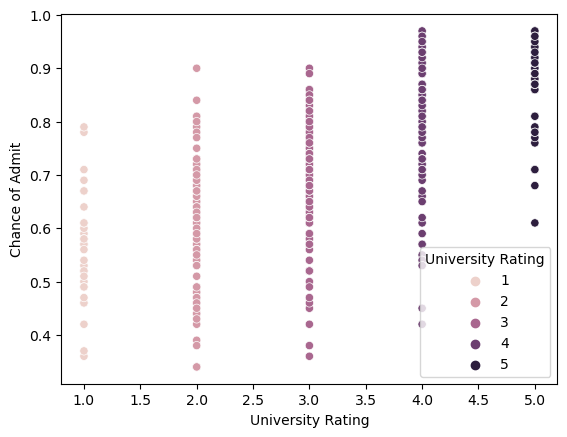

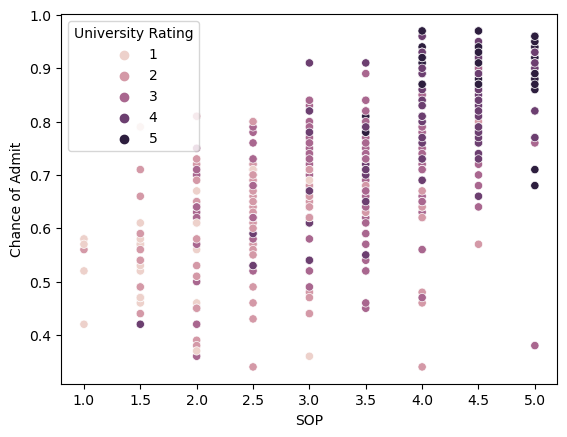

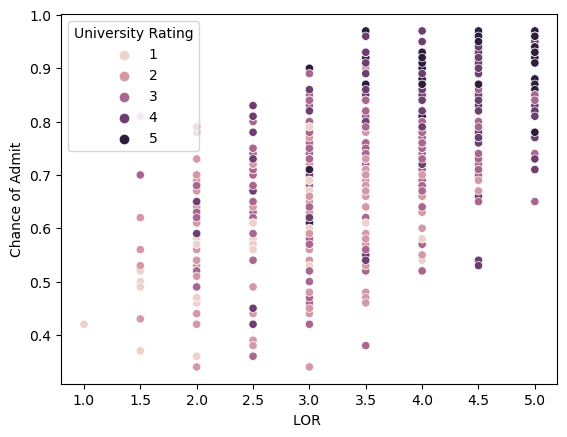

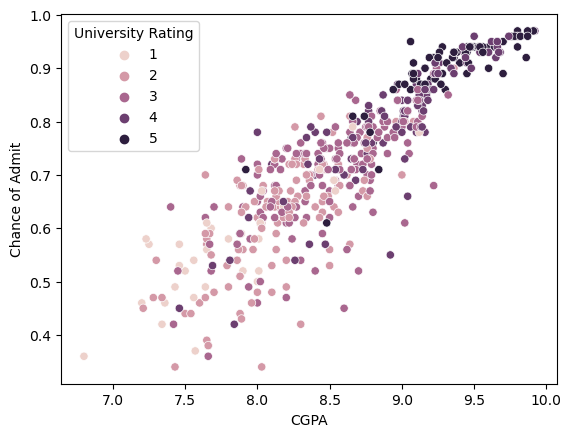

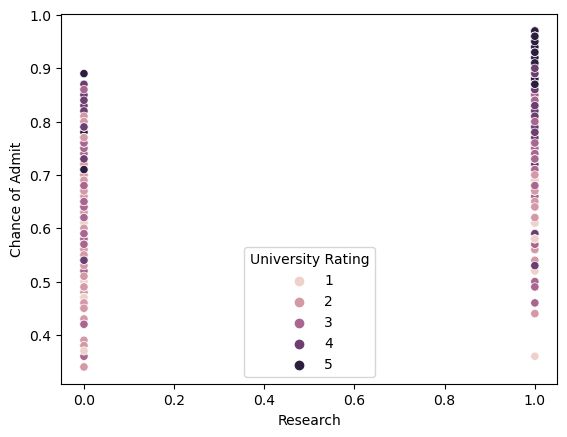

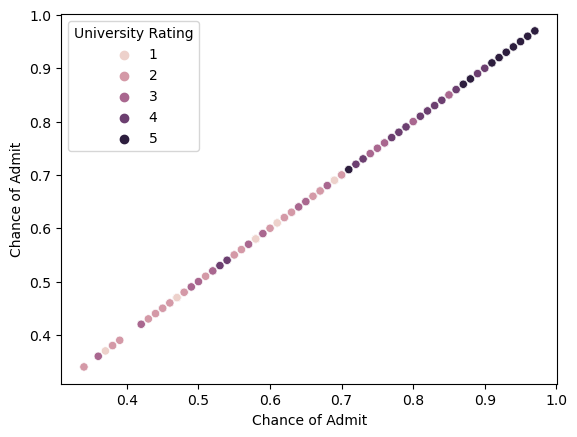

In [11]:
"""
The provided code snippet uses a loop to create scatterplots between each numerical column in the DataFrame admission_df and the 'Chance of Admit' column. It adds color differentiation based on the 'University Rating' column. Here's a breakdown:

python
Copy code
for i in admission_df.columns:
    sns.scatterplot(x=i, y='Chance of Admit', hue="University Rating", hue_norm=(1, 5), data=admission_df)
    plt.show()
for i in admission_df.columns::

This loop iterates over each column in the DataFrame admission_df.
sns.scatterplot(x=i, y='Chance of Admit', hue="University Rating", hue_norm=(1, 5), data=admission_df):

Inside the loop, a scatterplot is created for each column (variable) against the 'Chance of Admit'.
The x=i specifies the variable on the x-axis, and y='Chance of Admit' is the variable on the y-axis.
hue="University Rating" adds color differentiation based on the 'University Rating' column.
hue_norm=(1, 5) sets the normalization range for the 'University Rating' colors from 1 to 5.
data=admission_df specifies the DataFrame.
plt.show():

This line displays the current scatterplot before moving to the next one in the loop."""
for i in admission_df.columns:
  sns.scatterplot(x = i, y='Chance of Admit', hue = "University Rating", hue_norm=(1,5),data= admission_df)
  plt.show()



In [12]:
"""corr() calculates the correlation matrix for the numerical columns in the DataFrame admission_df. The resulting matrix, 
stored in the variable corr_matrix, provides a comprehensive overview of the pairwise correlations between variables. 
Correlation coefficients range from -1 to 1, indicating the strength and direction of relationships. A coefficient close 
to 1 implies a strong positive correlation, close to -1 indicates a strong negative correlation, and close to 0 suggests 
little to no linear relationship. This matrix is valuable for understanding how different factors, such as GRE Score, TOEFL 
Score, and CGPA, are correlated with each other and, particularly, their correlation with the 'Chance of Admit' variable. 
Positive correlations suggest variables that tend to increase together, while negative correlations imply variables that 
tend to move in opposite directions.

"""
corr_matrix = admission_df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


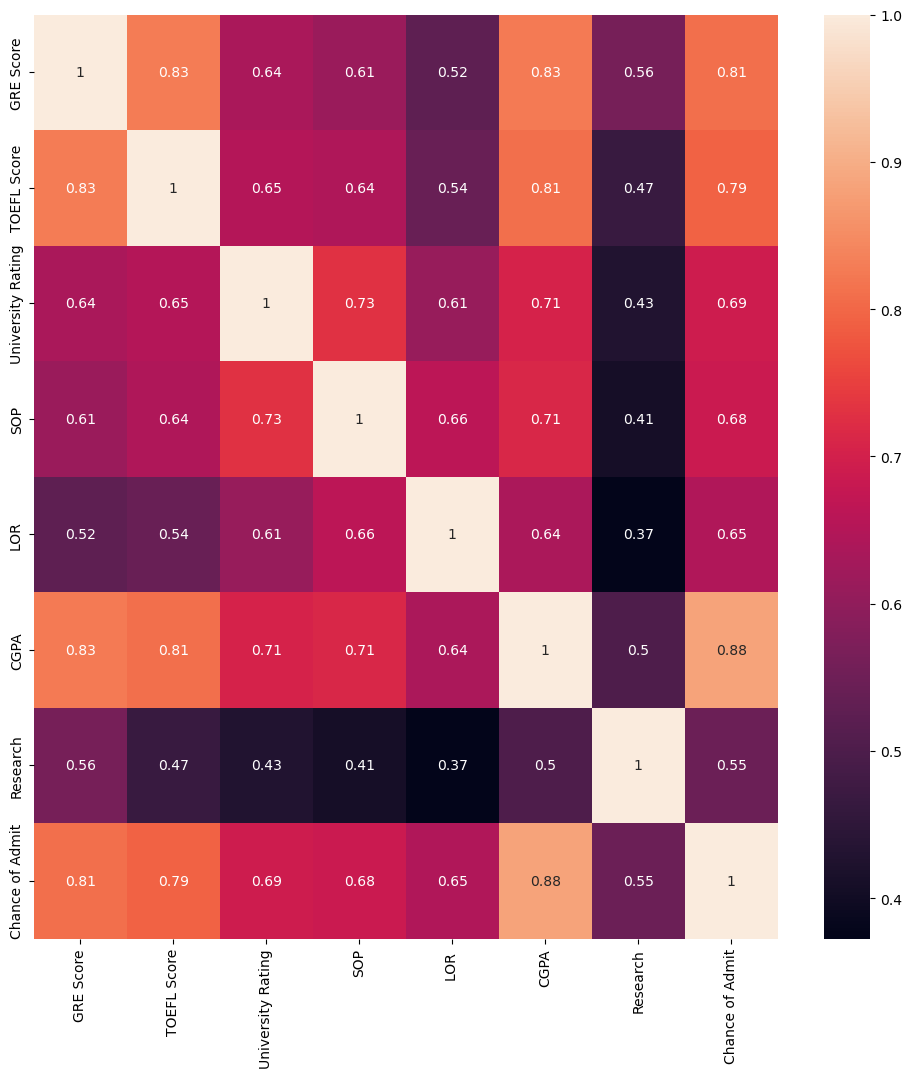

In [13]:
#This line sets the size of the figure (plot) using Matplotlib. The figsize=(12, 12) argument specifies a figure size of 
#12 inches by 12 inches, making it a square-shaped plot.
plt.figure(figsize = (12,12))
"""The sns.heatmap function from Seaborn is used to create a heatmap of the correlation matrix (corr_matrix).
corr_matrix is the input data for which the heatmap is generated.
annot=True adds the numerical values of the correlation coefficients to each cell in the heatmap."""
sns.heatmap(corr_matrix, annot = True)
#This line displays the resulting heatmap.
plt.show()
# From the correlation matrix, it can be seen that, all parameters have positive correlation with chance of getting admission in to the university.


## CREATE TRAINING AND TESTING DATASET

In [14]:
"""
The admission_df.columns attribute is used to retrieve the column labels (names) of the DataFrame admission_df. 
When you execute admission_df.columns, it returns a pandas Index object containing the names of all the columns 
in the DataFrame."""
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
"""
The line of code X = admission_df.drop(columns=['Chance of Admit']) creates a new DataFrame X by dropping the column labeled 
'Chance of Admit' from the original DataFrame admission_df. It does not mean we are deleting Chance of Admit from dataframe"""
X = admission_df.drop(columns = ['Chance of Admit'])

In [16]:
"""
The line of code y = admission_df['Chance of Admit'] creates a new variable y by extracting the 'Chance of Admit' column 
from the DataFrame admission_df. """
y = admission_df['Chance of Admit']

In [17]:
X.shape


(500, 7)

In [18]:
"""The result is a tuple with one element, 500. This means that y has 500 elements along its only dimension (axis)."""
"""The result (500,) obtained from y.shape indicates that the variable y is a one-dimensional array (or a pandas Series) 
with 500 elements."""
y.shape

(500,)

In [19]:
""" converting pandas DataFrames (X and y) to NumPy arrays (np.array(X) and np.array(y)) is often done when preparing data 
for machine learning. Many machine learning libraries and algorithms, like scikit-learn, expect input data in the form of NumPy 
arrays. Converting to NumPy arrays ensures compatibility with these libraries and facilitates numerical computations."""
X = np.array(X)
y = np.array(y)

In [20]:
print(y)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

In [21]:
# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
y.shape

(500, 1)

In [22]:
#After reshaping
print(y)

[[0.92]
 [0.76]
 [0.72]
 [0.8 ]
 [0.65]
 [0.9 ]
 [0.75]
 [0.68]
 [0.5 ]
 [0.45]
 [0.52]
 [0.84]
 [0.78]
 [0.62]
 [0.61]
 [0.54]
 [0.66]
 [0.65]
 [0.63]
 [0.62]
 [0.64]
 [0.7 ]
 [0.94]
 [0.95]
 [0.97]
 [0.94]
 [0.76]
 [0.44]
 [0.46]
 [0.54]
 [0.65]
 [0.74]
 [0.91]
 [0.9 ]
 [0.94]
 [0.88]
 [0.64]
 [0.58]
 [0.52]
 [0.48]
 [0.46]
 [0.49]
 [0.53]
 [0.87]
 [0.91]
 [0.88]
 [0.86]
 [0.89]
 [0.82]
 [0.78]
 [0.76]
 [0.56]
 [0.78]
 [0.72]
 [0.7 ]
 [0.64]
 [0.64]
 [0.46]
 [0.36]
 [0.42]
 [0.48]
 [0.47]
 [0.54]
 [0.56]
 [0.52]
 [0.55]
 [0.61]
 [0.57]
 [0.68]
 [0.78]
 [0.94]
 [0.96]
 [0.93]
 [0.84]
 [0.74]
 [0.72]
 [0.74]
 [0.64]
 [0.44]
 [0.46]
 [0.5 ]
 [0.96]
 [0.92]
 [0.92]
 [0.94]
 [0.76]
 [0.72]
 [0.66]
 [0.64]
 [0.74]
 [0.64]
 [0.38]
 [0.34]
 [0.44]
 [0.36]
 [0.42]
 [0.48]
 [0.86]
 [0.9 ]
 [0.79]
 [0.71]
 [0.64]
 [0.62]
 [0.57]
 [0.74]
 [0.69]
 [0.87]
 [0.91]
 [0.93]
 [0.68]
 [0.61]
 [0.69]
 [0.62]
 [0.72]
 [0.59]
 [0.66]
 [0.56]
 [0.45]
 [0.47]
 [0.71]
 [0.94]
 [0.94]
 [0.57]
 [0.61]
 [0.57]


In [23]:
# scaling the data before training the model
"""The code you provided is scaling the feature matrix (X) and the target variable (y) using the StandardScaler from 
scikit-learn. Standard scaling (also known as Z-score normalization) is a common preprocessing step in machine learning to 
ensure that features have similar scales. Here's an explanation:

Scaling the Features (X):

scaler_x = StandardScaler():
Creates an instance of the StandardScaler class, which will be used to scale the features.
X = scaler_x.fit_transform(X):
Applies the scaler to the feature matrix X.
fit_transform method computes the mean and standard deviation of each feature in X and scales the features to have zero mean 
and unit variance.
The transformed X is then assigned back to the variable."""

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [24]:
# spliting the data in to test and train sets
"""from sklearn.model_selection import train_test_split:

Imports the train_test_split function from scikit-learn's model_selection module.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15):

X and y:
These are the feature matrix and target variable that you want to split into training and testing sets.
test_size=0.15:
Specifies that 15% of the data will be used as the testing set, and the remaining 85% will be used as the training set.
The test_size parameter can be adjusted based on the desired split ratio.
X_train, X_test, y_train, y_test:

These variables store the resulting training and testing sets for features (X) and the target variable (y).
The data is randomly shuffled and split into the specified proportions."""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)



## TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [25]:
"""
The provided code is using scikit-learn to create a linear regression model, train it on the training data, and then 
evaluate its performance. This imports the LinearRegression class from scikit-learn, which represents the linear regression 
model. It also imports metrics like mean_squared_error that can be used to evaluate the model.


The accuracy_score is a metric used for evaluating the performance of classification models. It is particularly applicable 
when you have a set of predicted labels and a corresponding set of true labels, and you want to measure how accurately the 
model has predicted the class labels.

In scikit-learn, the accuracy_score function is part of the sklearn.metrics module."""

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
#This line creates an instance of the LinearRegression class, representing a linear regression model. 
#This model will be trained on the provided data.
LinearRegression_model = LinearRegression()
"""The fit method is used to train the linear regression model on the training data (X_train for features and y_train for the 
target variable). During this process, the model learns the coefficients (weights) that minimize the difference between the 
predicted values and the actual target values."""
LinearRegression_model.fit(X_train, y_train)


LinearRegression()

In [26]:
"""The score method in scikit-learn is used to evaluate the performance of a model on a given dataset. For regression models, 
like linear regression, the score method typically returns the coefficient of determination, also known as R-squared (R²)."""

"""
R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable 
(target variable) that is explained by the independent variables (features) in a regression model.
In the context of linear regression, it quantifies how well the model fits the data."""
"""R-squared values range from 0 to 1.
A value of 0 indicates that the model does not explain any of the variability in the dependent variable.
A value of 1 indicates that the model perfectly explains the variability in the dependent variable.
variability captures the extent to which data points deviate or spread out from a central value, providing insights 
into the distribution of data."""
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8474723750577068

## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [27]:
#!pip install --upgrade tensorflow-gpu==2.5.0


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [29]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [30]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 0.6389 - val_loss: 0.2428
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4110 - val_loss: 0.2261
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3172 - val_loss: 0.1907
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2923 - val_loss: 0.1961
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3163 - val_loss: 0.2111
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2673 - val_loss: 0.1805
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2626 - val_loss: 0.1832
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2671 - val_loss: 0.1761
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2537 - val_loss: 0.1725
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2474 - val_loss: 0.1752
Epoch 11

17/17 [==============================] - 0s 3ms/step - loss: 0.1205 - val_loss: 0.2551
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1208 - val_loss: 0.2459
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1079 - val_loss: 0.2299
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1252 - val_loss: 0.2400
Epoch 87/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.2345
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1295 - val_loss: 0.2492
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1099 - val_loss: 0.2263
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1112 - val_loss: 0.2586
Epoch 91/100
17/17 [==============================] - ETA: 0s - loss: 0.103 - 0s 3ms/step - loss: 0.1225 - val_loss: 0.2663
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1165 - val_lo

In [31]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 1ms/step - loss: 0.2661
Accuracy : 0.7338866293430328


In [32]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

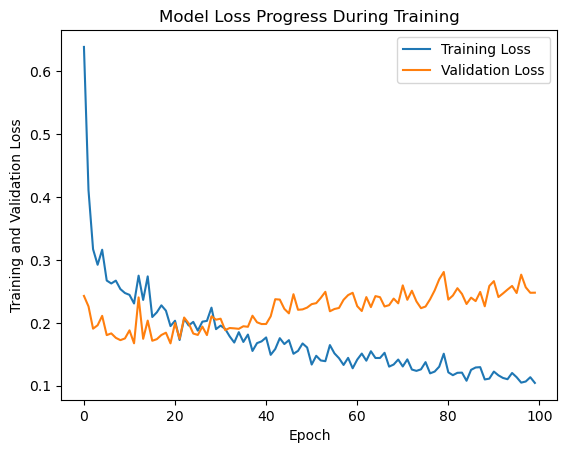

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

## TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [34]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5974957498265996

In [36]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)

C:\Users\vidus\AppData\Local\Temp\ipykernel_1748\1384816765.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [37]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7895470271618633

## PRINT KPIs FOR THE BEST MODEL

Text(0, 0.5, 'True Values')

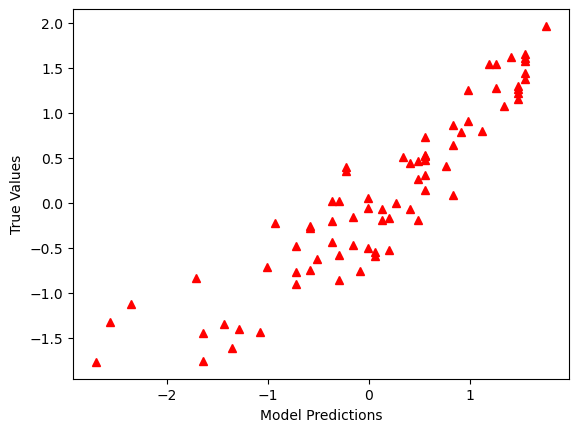

In [38]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [39]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


Text(0, 0.5, 'True Values')

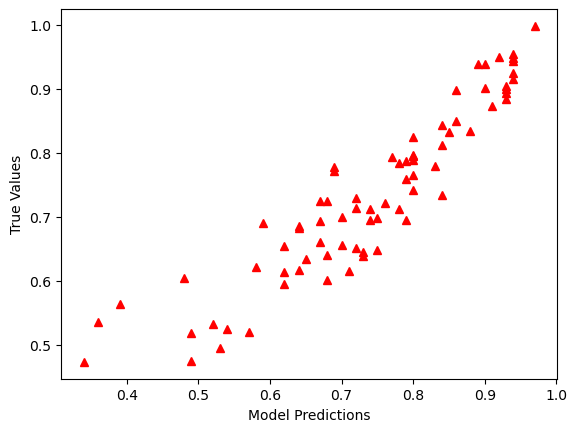

In [40]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [41]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.057 
MSE = 0.0032761198412183004 
MAE = 0.04306646608353135 
R2 = 0.8474723750577068 
Adjusted R2 = 0.8315366530488104
